In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.axes_grid1 import make_axes_locatable
from scipy.spatial import ConvexHull, convex_hull_plot_2d 
from source_draft import preprocess as prep

from scipy.stats import entropy
from Bio import SeqIO

In [2]:
plt.rcParams.update({'font.family': 'Arial'})
plt.rcParams.update({'font.size': 9})

In [3]:
# Natural sequences
merge_ds = pd.read_excel('data/20210908_natural_with_taxonomy.xls').iloc[:,1:]
SH3 = merge_ds['Sequences']
mmd_nat_coord = np.array(merge_ds[['MMD_z0','MMD_z1','MMD_z2']])

RE_nat = merge_ds['norm_RE']
good_nat = [i for i in range(len(RE_nat)) if RE_nat[i]>.5 and RE_nat[i]<10]
nogood_nat = [i for i in range(len(RE_nat)) if RE_nat[i]<.5 and RE_nat[i]>-10]

### Define paralog groups:

In [58]:
# abp1 paralog group: 
abp1_merge_df = merge_ds[ merge_ds['orthologous_group'] == 'KOG3655' ]

# bzz1_1 paralog group: 
bzz1_merge_df = merge_ds[ merge_ds['orthologous_group'] == 'KOG3565_1' ]

# rvs167 paralog group: 
rvs167_merge_df = merge_ds[ merge_ds['orthologous_group'] == 'KOG3601' ]

# sho1 paralog group:
sho1_merge_df = merge_ds[ merge_ds['orthologous_group'] == 'NOG09120' ]


In [59]:
# create mmd embeddings:

# latent codes for abp1 orthologs
abp1_z = abp1_merge_df[['MMD_z0', 'MMD_z1', 'MMD_z2']].values
# latent codes for bzz1 orthologs
bzz1_z = bzz1_merge_df[['MMD_z0', 'MMD_z1', 'MMD_z2']].values
# latent codes for rvs167 orthologs
rvs167_z = rvs167_merge_df[['MMD_z0', 'MMD_z1', 'MMD_z2']].values
# latent codes for sho1 orthologs
sho1_z = sho1_merge_df[['MMD_z0', 'MMD_z1', 'MMD_z2']].values



## Define Convex hull:

In [21]:
def compute_hull(data, hull):
    ix = np.where(data == hull)[0]
    coord = mmd_nat_coord[ix,:]
    return ConvexHull(coord)

def check_latent_in_hull(z_coord, hull, tolerance = 10**-12):
    decision = all((np.dot(equa[:-1], z_coord) + equa[-1] <= tolerance) for equa in hull.equations)
    return decision

def check_hull_list(l, hull):
    return np.array([check_latent_in_hull(i, hull) for i in l])

def freq_mat(heatmap_list):
    frequence = np.zeros([21, 59])
    listseq = np.array([list(i) for i in heatmap_list])
    for num, i in enumerate('-ACDEFGHIKLMNPQRSTVWY'):
        for j in range(59):
            frequence[num,j] = np.count_nonzero(listseq[:,j]==i)/len(heatmap_list)
    return(frequence)

def compute_entropy(seq):
    return entropy(freq_mat(seq),base=2)

In [ ]:
# remove outliers:
abp1_z = abp1_z[~(abp1_z[:,1] >= 0)]

## Compute convex hulls:

In [76]:
# abp1 convex hull:
abp1_hull = ConvexHull(abp1_z)

# rvs167 convex hull:
rvs167_hull = ConvexHull(rvs167_z)

# bzz1 convex hull:
bzz1_hull = ConvexHull(bzz1_z)

# sho1 convex hull:
sho1_hull = ConvexHull(sho1_z)


## Plot paralog convex hulls:

#### no rotation:

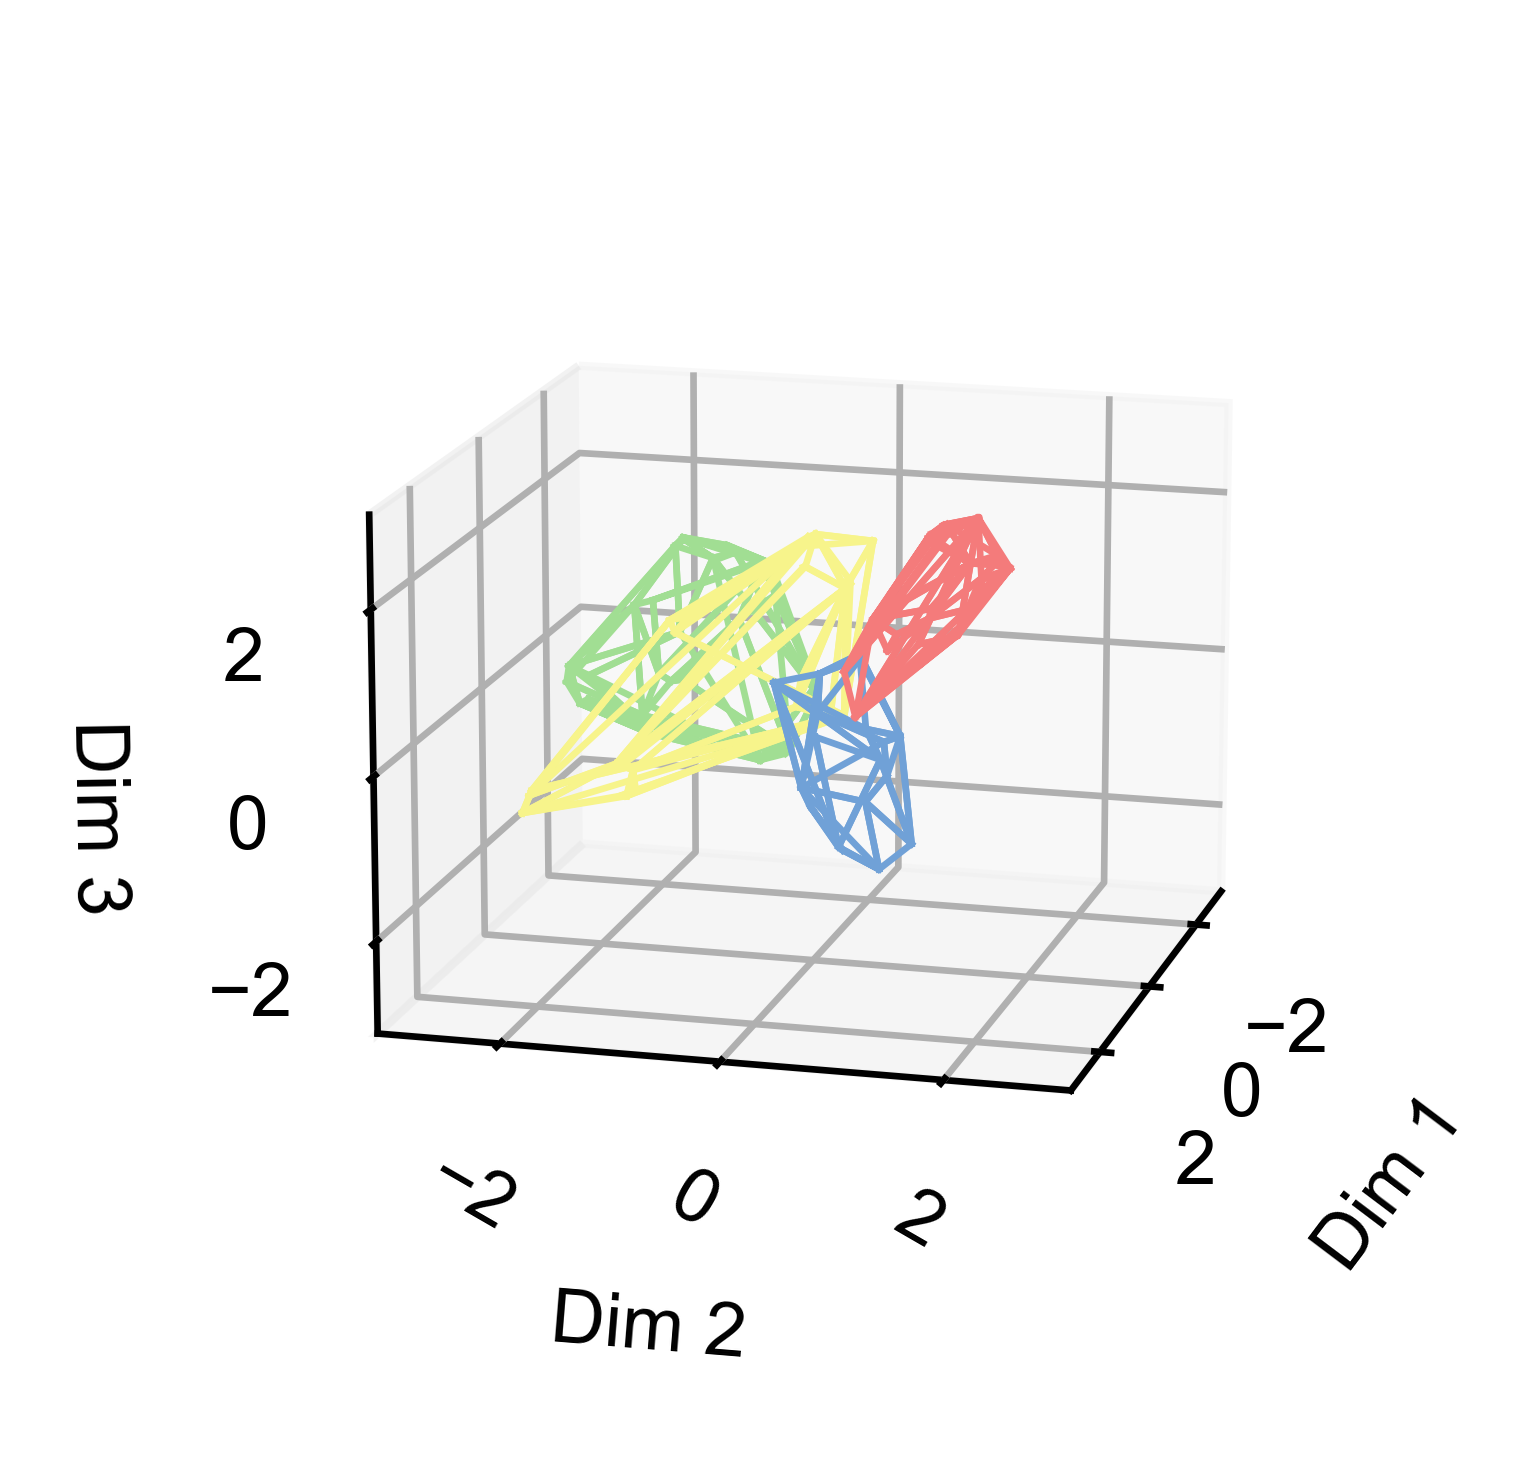

In [94]:

for fig_idx, rot_val in zip([0], [15]):
    
    
    fig = plt.figure(figsize = (2.5,2.5),dpi = 600)

    ax = plt.axes(projection="3d")
    ax.view_init(15, rot_val)

   # convex hull abp1: 
    for simplex in abp1_hull.simplices:
        ax.plot(abp1_z[simplex, 0], abp1_z[simplex, 1],  abp1_z[simplex, 2], 'k-', c = '#a1de93', lw=.8)
        
    # convex hull rvs167: 
    for simplex in rvs167_hull.simplices:
        ax.plot(rvs167_z[simplex, 0], rvs167_z[simplex, 1],  rvs167_z[simplex, 2], 'k-', c = '#f7f48b', lw=.8)
    

    # convex hull bzz1: 
    for simplex in bzz1_hull.simplices:
        ax.plot(bzz1_z[simplex, 0], bzz1_z[simplex, 1], bzz1_z[simplex, 2], 'k-', c = '#70a1d7', lw=.8)
        

    # convex hull sho11: 
    for simplex in sho1_hull.simplices:
        ax.plot(sho1_z[simplex, 0], sho1_z[simplex, 1],  sho1_z[simplex, 2], 'k-', c = '#f47b7b',lw=.8)


    ax.set_xlabel('Dim 1', labelpad=9)
    ax.set_ylabel('Dim 2', labelpad=9)
    ax.set_zlabel('Dim 3')
    ax.dist = 12.4
                  
    plt.yticks(rotation=-30)
    
    ax.set_xlim([-3, 3])
    ax.set_ylim([-3, 3])
    ax.set_zlim([-3, 3])
    
    plt.tight_layout()

#### first 90 rotation:

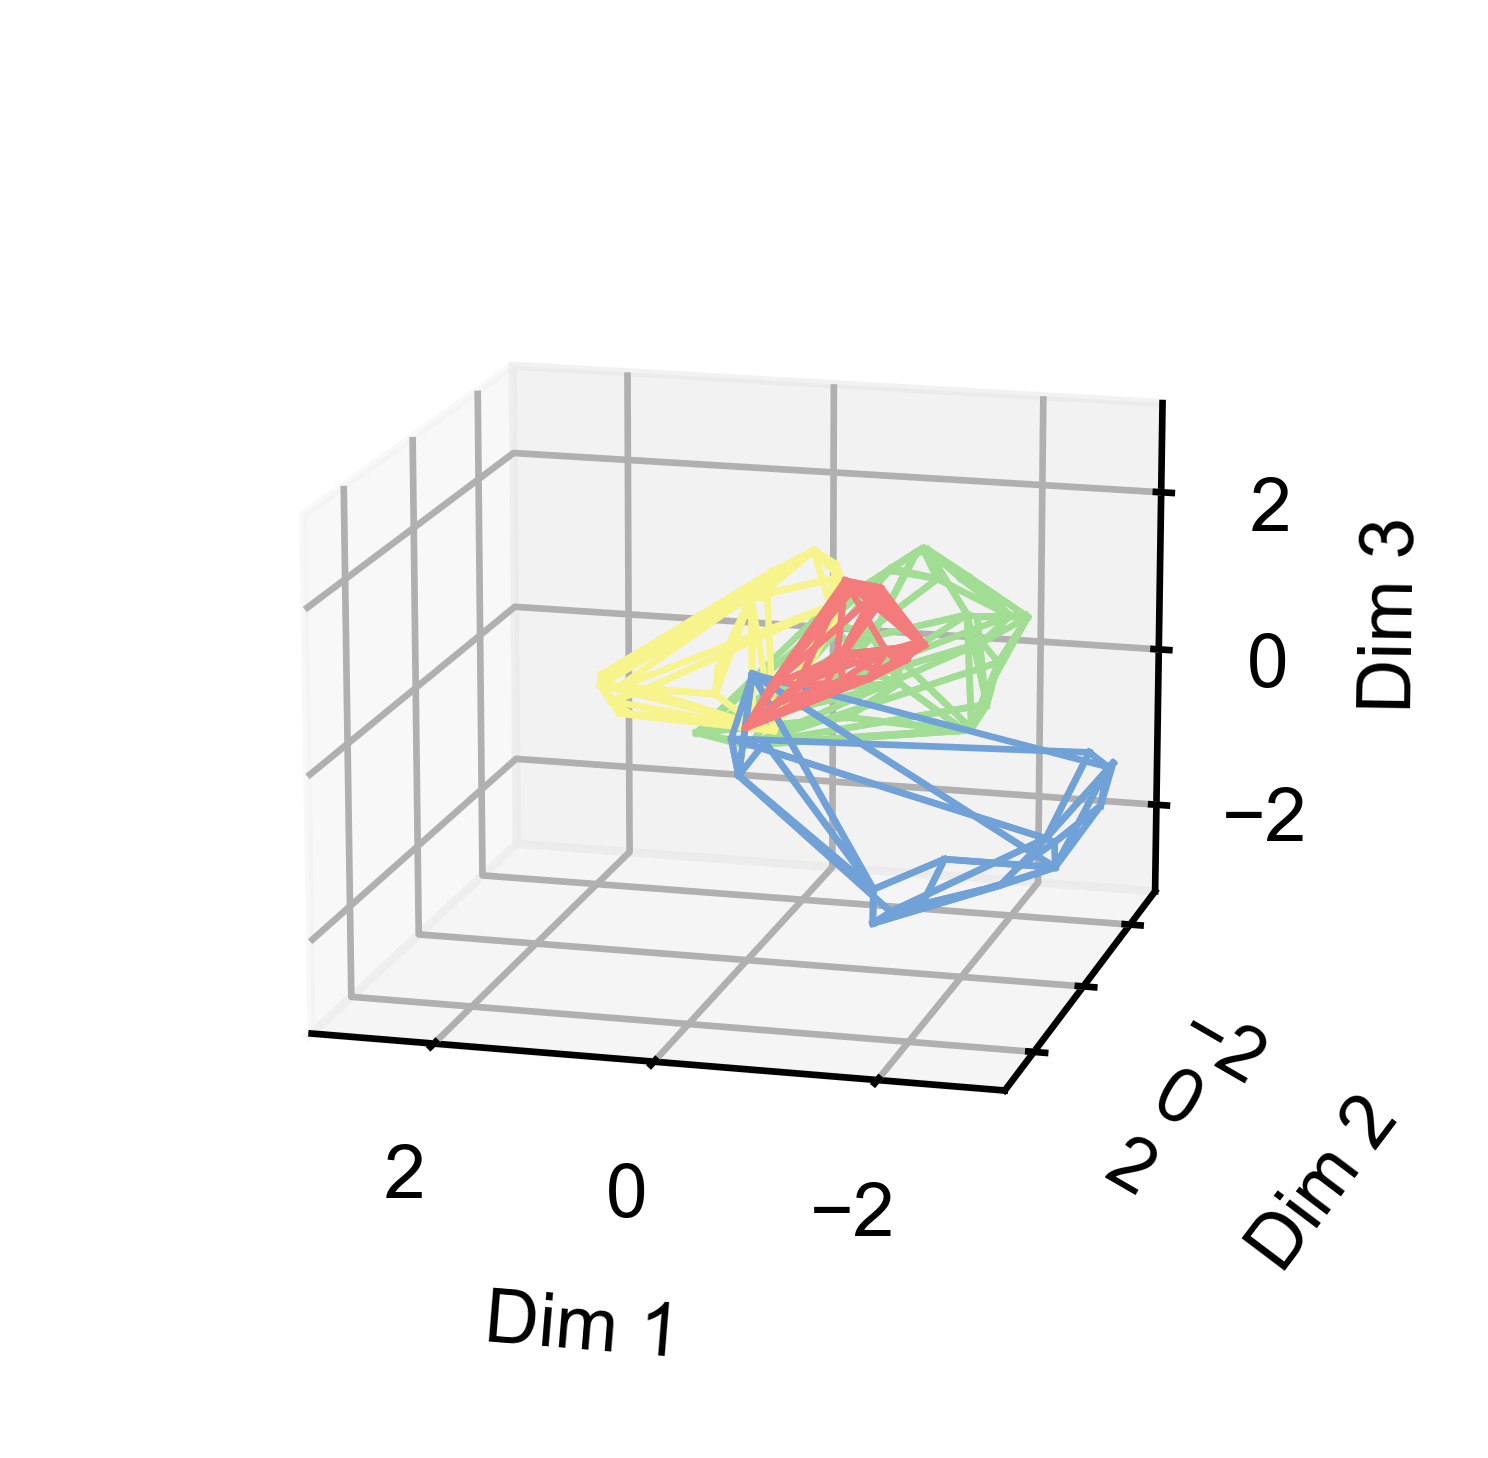

In [97]:

for fig_idx, rot_val in zip([0], [105]):
    
    
    fig = plt.figure(figsize = (2.5,2.5),dpi = 600)

    ax = plt.axes(projection="3d")
    ax.view_init(15, rot_val)

    # convex hull abp1: 
    for simplex in abp1_hull.simplices:
        ax.plot(abp1_z[simplex, 0], abp1_z[simplex, 1],  abp1_z[simplex, 2], 'k-', c = '#a1de93', lw=.8)
        
    # convex hull rvs167: 
    for simplex in rvs167_hull.simplices:
        ax.plot(rvs167_z[simplex, 0], rvs167_z[simplex, 1],  rvs167_z[simplex, 2], 'k-', c = '#f7f48b', lw=.8)
    
    # convex hull bzz1: 
    for simplex in bzz1_hull.simplices:
        ax.plot(bzz1_z[simplex, 0], bzz1_z[simplex, 1], bzz1_z[simplex, 2], 'k-', c = '#70a1d7', lw=.8)
        

    # convex hull sho11: 
    for simplex in sho1_hull.simplices:
        ax.plot(sho1_z[simplex, 0], sho1_z[simplex, 1],  sho1_z[simplex, 2], 'k-', c = '#f47b7b',lw=.8)


    ax.set_xlabel('Dim 1', labelpad=9)
    ax.set_ylabel('Dim 2', labelpad=9)
    ax.set_zlabel('Dim 3')
    ax.dist = 12.4
                  
    plt.yticks(rotation=-30)
    
    ax.set_xlim([-3, 3])
    ax.set_ylim([-3, 3])
    ax.set_zlim([-3, 3])
    
    plt.tight_layout()

#### 180 rotation

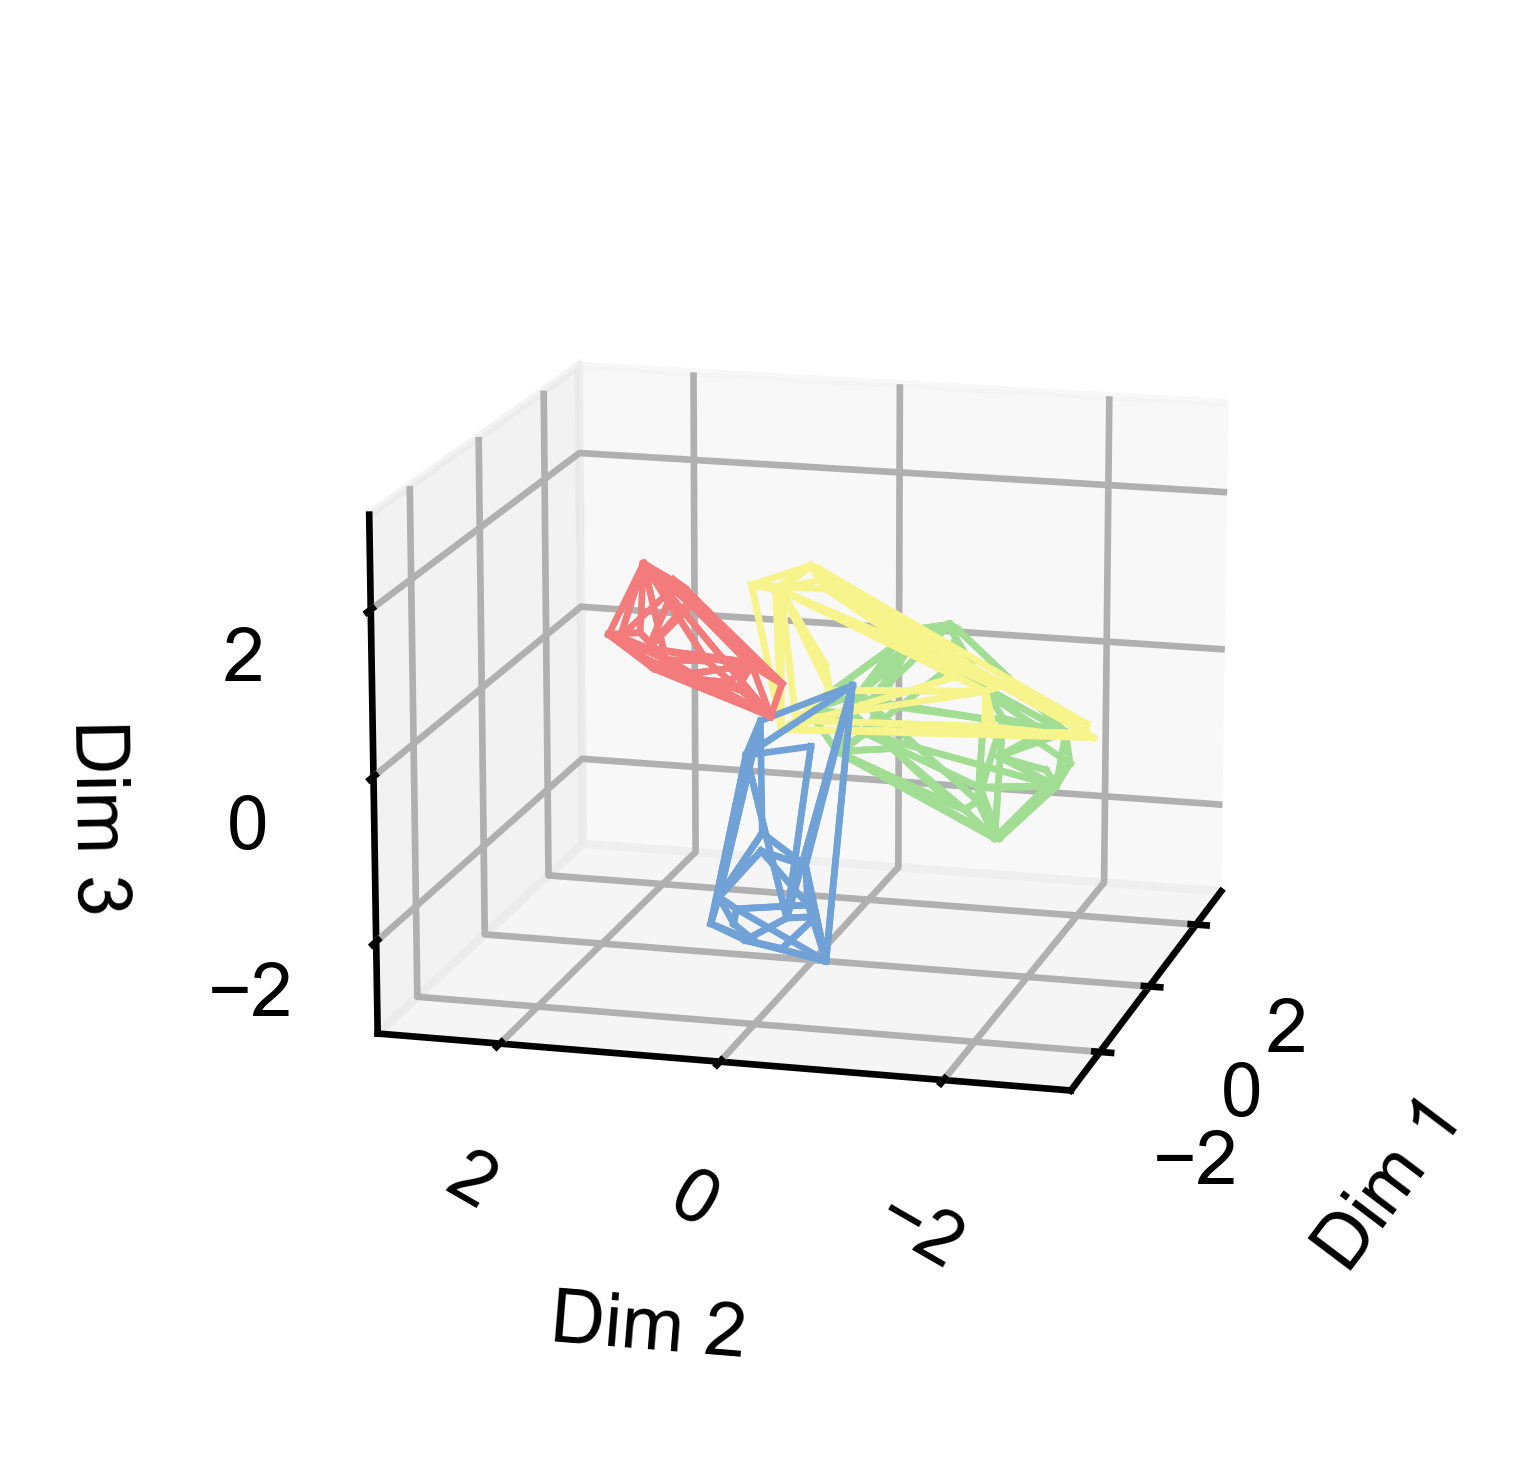

In [98]:
  
for fig_idx, rot_val in zip([0], [195]):
    
    
    fig = plt.figure(figsize = (2.5,2.5),dpi = 600)

    ax = plt.axes(projection="3d")
    ax.view_init(15, rot_val)


    # convex hull abp1: 
    for simplex in abp1_hull.simplices:
        ax.plot(abp1_z[simplex, 0], abp1_z[simplex, 1],  abp1_z[simplex, 2], 'k-', c = '#a1de93', lw=.8)
        
    # convex hull rvs167: 
    for simplex in rvs167_hull.simplices:
        ax.plot(rvs167_z[simplex, 0], rvs167_z[simplex, 1],  rvs167_z[simplex, 2], 'k-', c = '#f7f48b', lw=.8)
    
    # convex hull bzz1: 
    for simplex in bzz1_hull.simplices:
        ax.plot(bzz1_z[simplex, 0], bzz1_z[simplex, 1], bzz1_z[simplex, 2], 'k-', c = '#70a1d7', lw=.8)
        
    # convex hull sho11: 
    for simplex in sho1_hull.simplices:
        ax.plot(sho1_z[simplex, 0], sho1_z[simplex, 1],  sho1_z[simplex, 2], 'k-', c = '#f47b7b',lw=.8)


    ax.set_xlabel('Dim 1', labelpad=9)
    ax.set_ylabel('Dim 2', labelpad=9)
    ax.set_zlabel('Dim 3')
    ax.dist = 12.4
                  
    plt.yticks(rotation=-30)
    
    ax.set_xlim([-3, 3])
    ax.set_ylim([-3, 3])
    ax.set_zlim([-3, 3])
    
    plt.tight_layout()

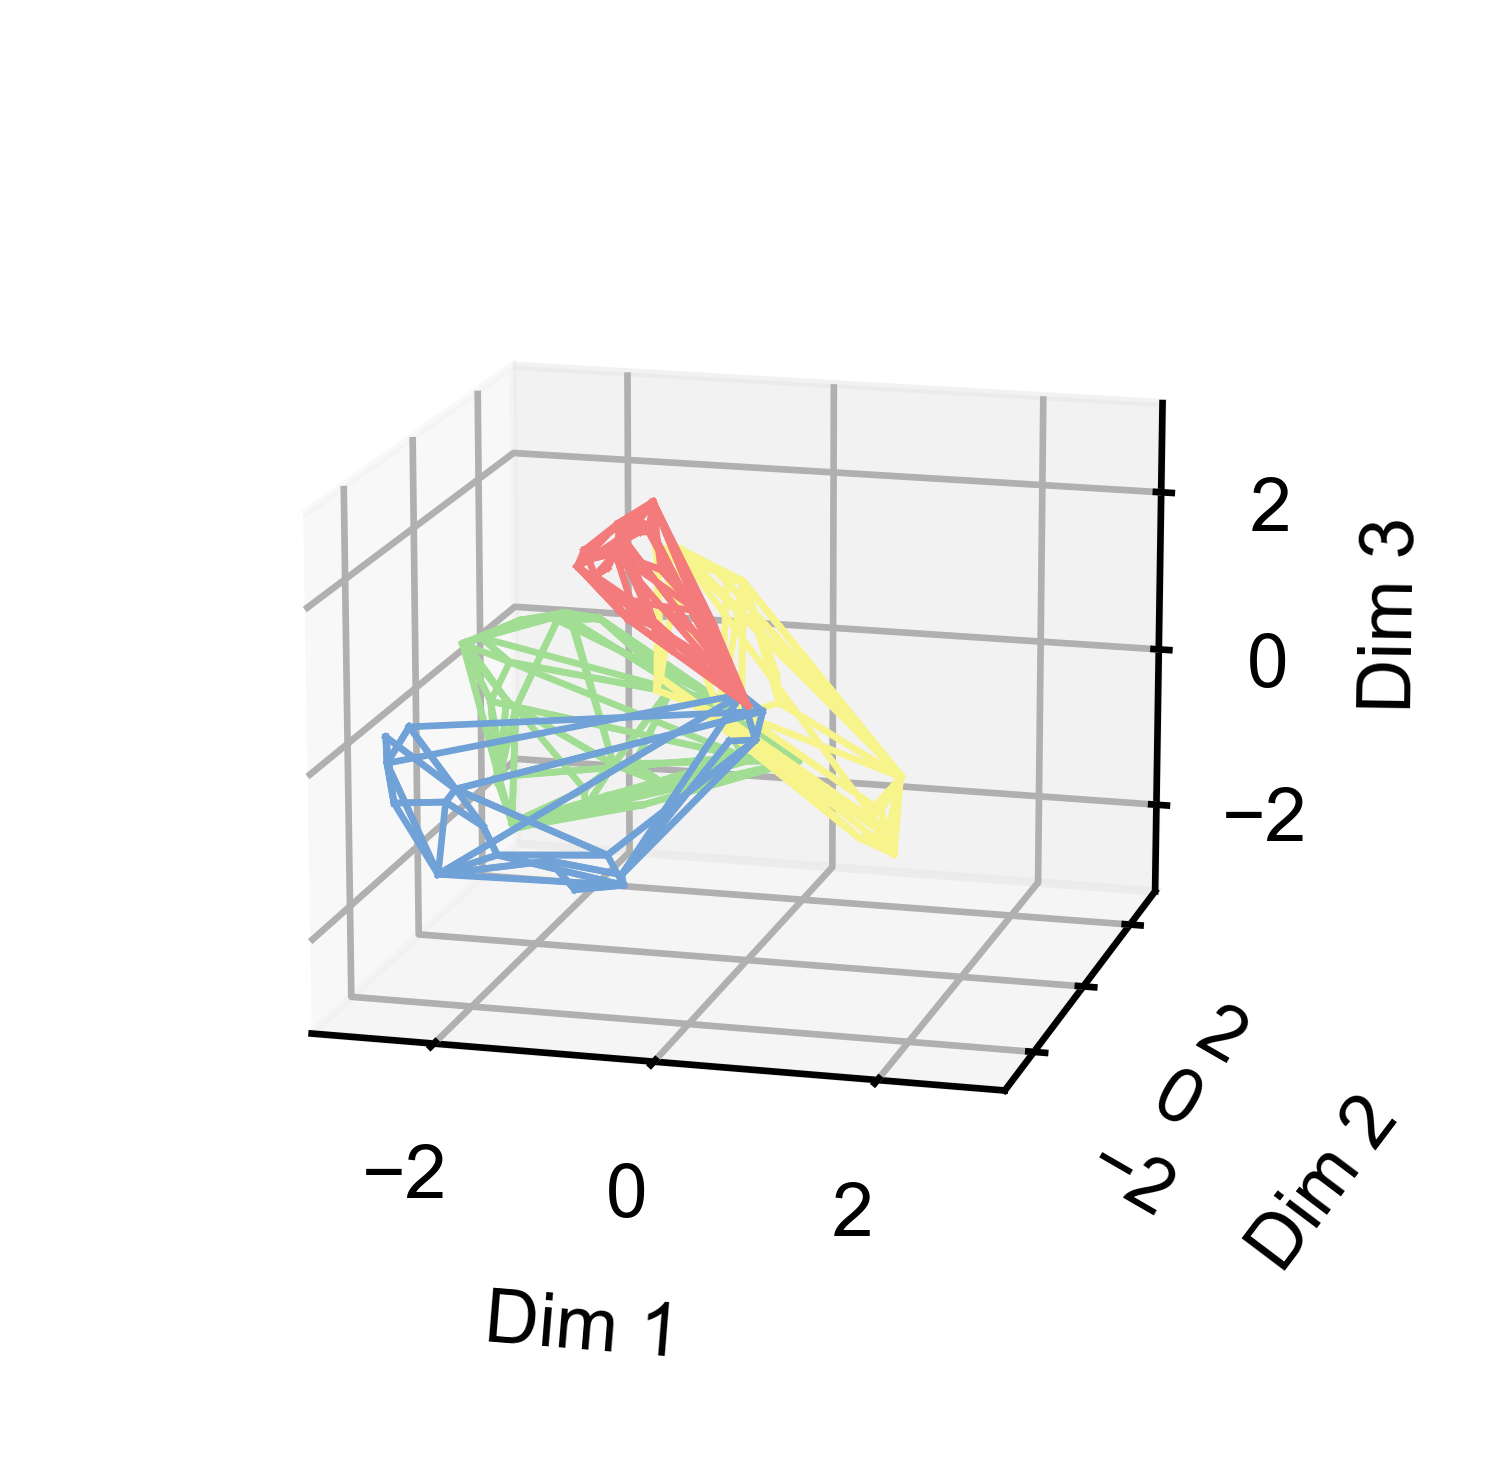

In [100]:
  
for fig_idx, rot_val in zip([0], [285]):
    
    
    fig = plt.figure(figsize = (2.5,2.5),dpi = 600)

    ax = plt.axes(projection="3d")
    ax.view_init(15, rot_val)


    # convex hull abp1: 
    for simplex in abp1_hull.simplices:
        ax.plot(abp1_z[simplex, 0], abp1_z[simplex, 1],  abp1_z[simplex, 2], 'k-', c = '#a1de93', lw=.8)

    # convex hull rvs167: 
    for simplex in rvs167_hull.simplices:
        ax.plot(rvs167_z[simplex, 0], rvs167_z[simplex, 1],  rvs167_z[simplex, 2], 'k-', c = '#f7f48b', lw=.8)

    # convex hull bzz1: 
    for simplex in bzz1_hull.simplices:
        ax.plot(bzz1_z[simplex, 0], bzz1_z[simplex, 1], bzz1_z[simplex, 2], 'k-', c = '#70a1d7', lw=.8)
        
    # convex hull sho11: 
    for simplex in sho1_hull.simplices:
        ax.plot(sho1_z[simplex, 0], sho1_z[simplex, 1],  sho1_z[simplex, 2], 'k-', c = '#f47b7b',lw=.8)


    ax.set_xlabel('Dim 1', labelpad=9)
    ax.set_ylabel('Dim 2', labelpad=9)
    ax.set_zlabel('Dim 3')
    ax.dist = 12.4
                  
    plt.yticks(rotation=-30)
    
    ax.set_xlim([-3, 3])
    ax.set_ylim([-3, 3])
    ax.set_zlim([-3, 3])
    
    plt.tight_layout()

 ## Show convex hulls:

In [ ]:

for fig_idx, rot_val in zip([0], [15]):
    
    
    fig = plt.figure(figsize = (2.5,2.5),dpi = 600)

    ax = plt.axes(projection="3d")
    ax.view_init(15, rot_val)

   # convex hull abp1: 
    for simplex in abp1_hull.simplices:
        ax.plot(abp1_z[simplex, 0], abp1_z[simplex, 1],  abp1_z[simplex, 2], 'k-', c = '#a1de93', lw=.8)
        
    # convex hull rvs167: 
    for simplex in rvs167_hull.simplices:
        ax.plot(rvs167_z[simplex, 0], rvs167_z[simplex, 1],  rvs167_z[simplex, 2], 'k-', c = '#f7f48b', lw=.8)
    

    # convex hull bzz1: 
    for simplex in bzz1_hull.simplices:
        ax.plot(bzz1_z[simplex, 0], bzz1_z[simplex, 1], bzz1_z[simplex, 2], 'k-', c = '#70a1d7', lw=.8)
        

    # convex hull sho11: 
    for simplex in sho1_hull.simplices:
        ax.plot(sho1_z[simplex, 0], sho1_z[simplex, 1],  sho1_z[simplex, 2], 'k-', c = '#f47b7b',lw=.8)


    ax.set_xlabel('Dim 1', labelpad=9)
    ax.set_ylabel('Dim 2', labelpad=9)
    ax.set_zlabel('Dim 3')
    ax.dist = 12.4
                  
    plt.yticks(rotation=-30)
    
    ax.set_xlim([-3, 3])
    ax.set_ylim([-3, 3])
    ax.set_zlim([-3, 3])
    
    plt.tight_layout()

#### Plot convex hull for abp1:

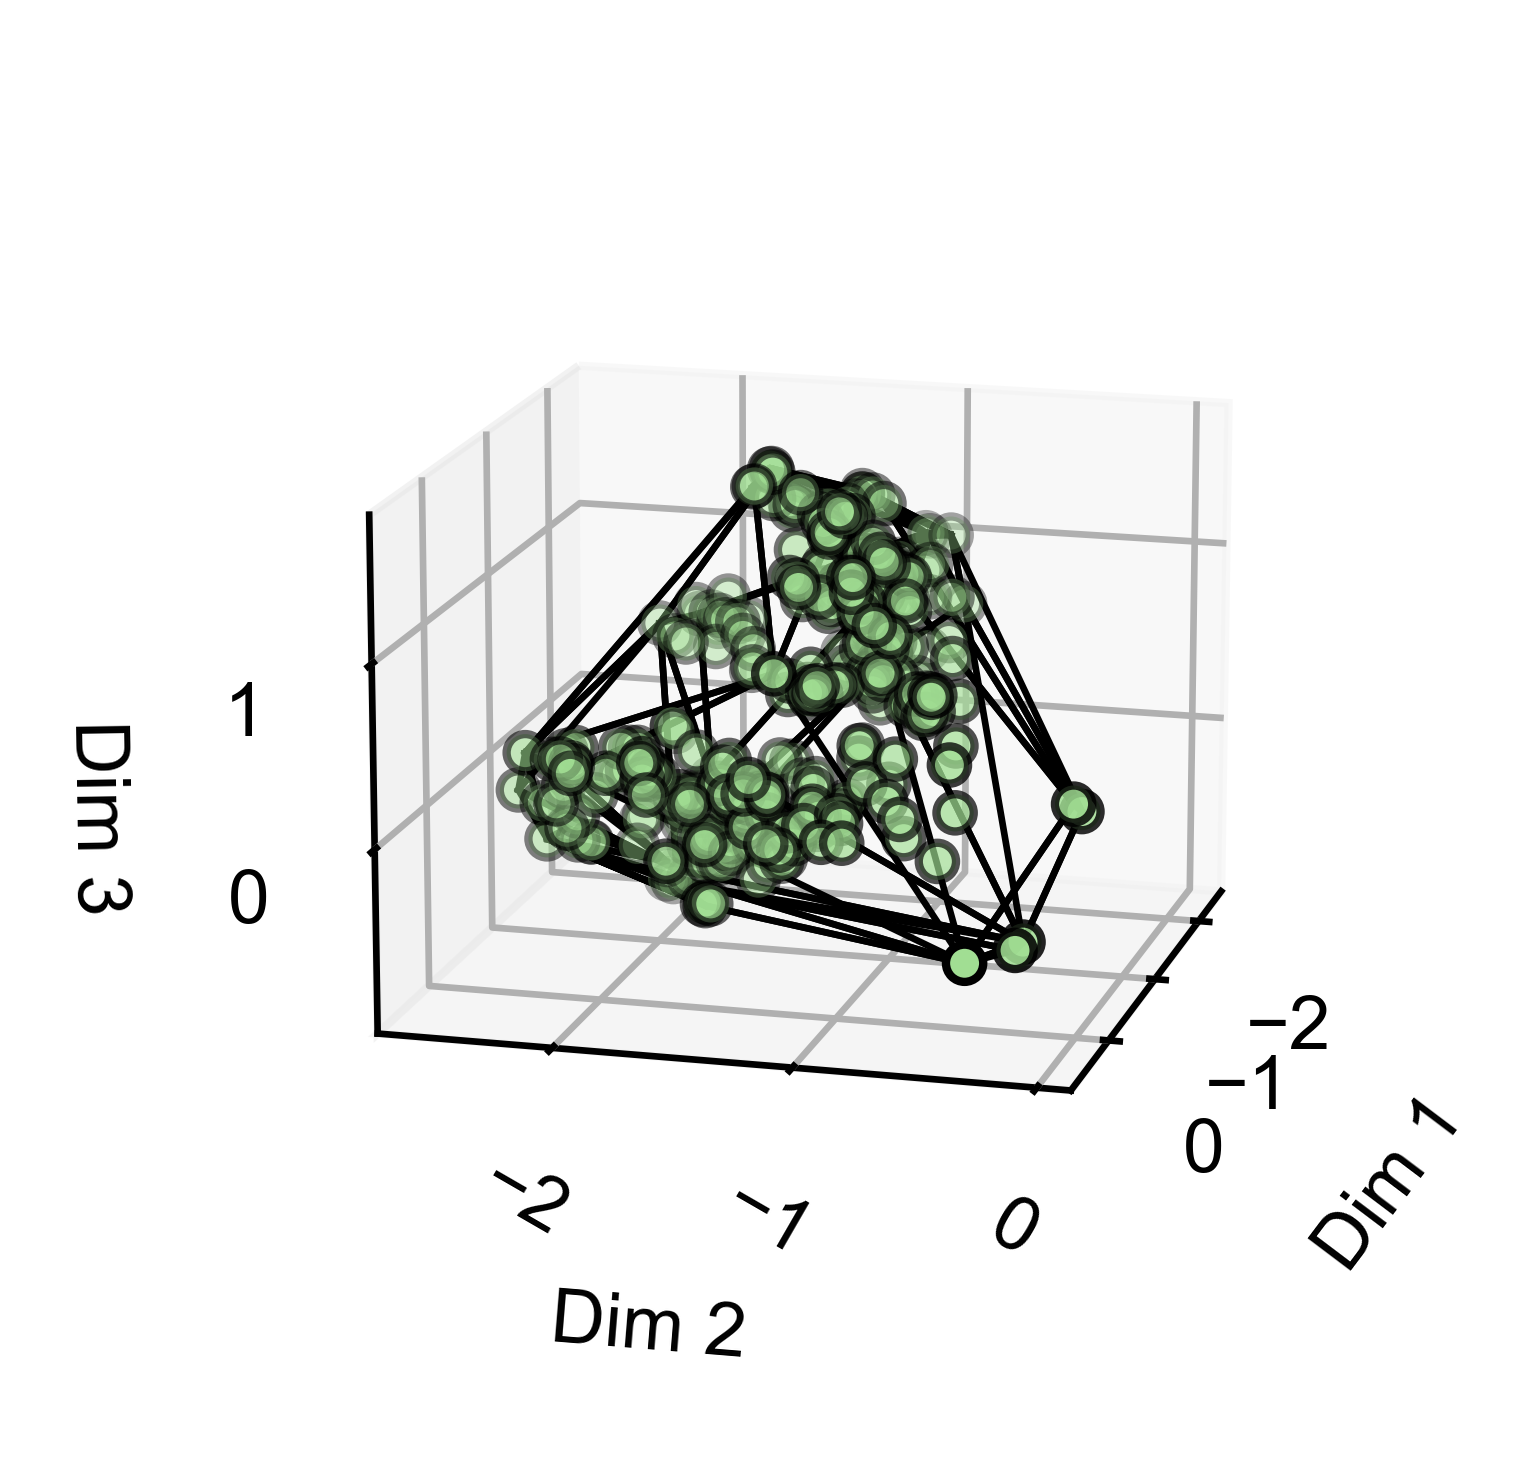

In [104]:

for fig_idx, rot_val in zip([0], [15]):
    
    
    fig = plt.figure(figsize = (2.5,2.5),dpi = 600)

    ax = plt.axes(projection="3d")
    ax.view_init(15, rot_val)
    
    
    p = ax.scatter(abp1_z[:,0], abp1_z[:,1], abp1_z[:,2], c = '#a1de93', edgecolor = 'k', s = 20)
    
   # convex hull abp1: 
    for simplex in abp1_hull.simplices:
        ax.plot(abp1_z[simplex, 0], abp1_z[simplex, 1],  abp1_z[simplex, 2], 'k-', c = 'k', lw=.8)
 

    ax.set_xlabel('Dim 1', labelpad=9)
    ax.set_ylabel('Dim 2', labelpad=9)
    ax.set_zlabel('Dim 3')
    ax.dist = 12.4
                  
    plt.yticks(rotation=-30)
    
#    ax.set_xlim([-3, 3])
#    ax.set_ylim([-3, 3])
#    ax.set_zlim([-3, 3])
    
    plt.tight_layout()

#### Plot convex hull for rvs167

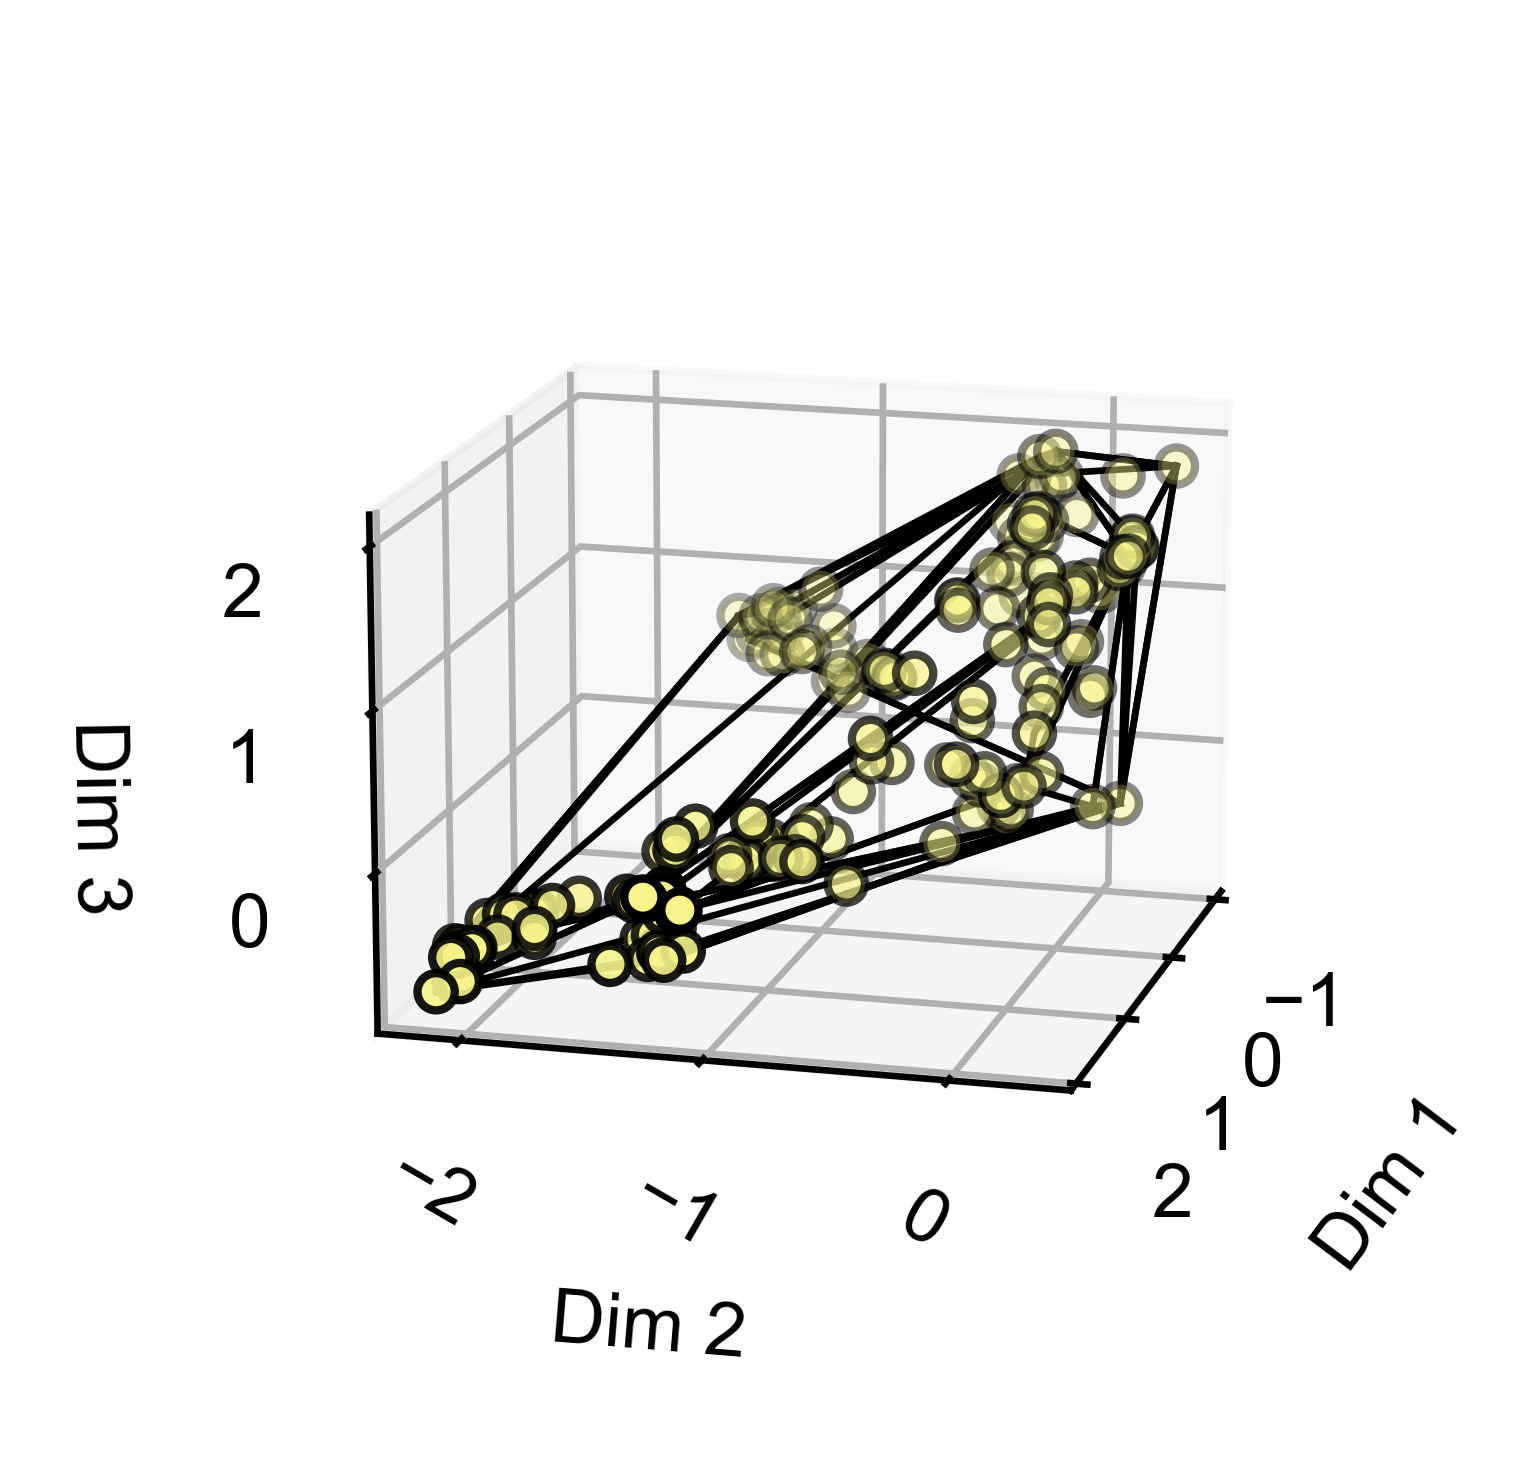

In [114]:

for fig_idx, rot_val in zip([0], [15]):
    
    
    fig = plt.figure(figsize = (2.5,2.5),dpi = 600)

    ax = plt.axes(projection="3d")
    ax.view_init(15, rot_val)
    
    
    p = ax.scatter(rvs167_z[:,0], rvs167_z[:,1], rvs167_z[:,2], c = '#f7f48b', edgecolor = 'k', s = 20)
    
    # convex hull rvs167: 
    for simplex in rvs167_hull.simplices:
        ax.plot(rvs167_z[simplex, 0], rvs167_z[simplex, 1],  rvs167_z[simplex, 2], 'k-', c = 'k',  lw=.8)
    

    ax.set_xlabel('Dim 1', labelpad=9)
    ax.set_ylabel('Dim 2', labelpad=9)
    ax.set_zlabel('Dim 3')
    ax.dist = 12.4
                  
    plt.yticks(rotation=-30)
    
    
    plt.tight_layout()

In [ ]:
#### Plot convex hull for abp1:

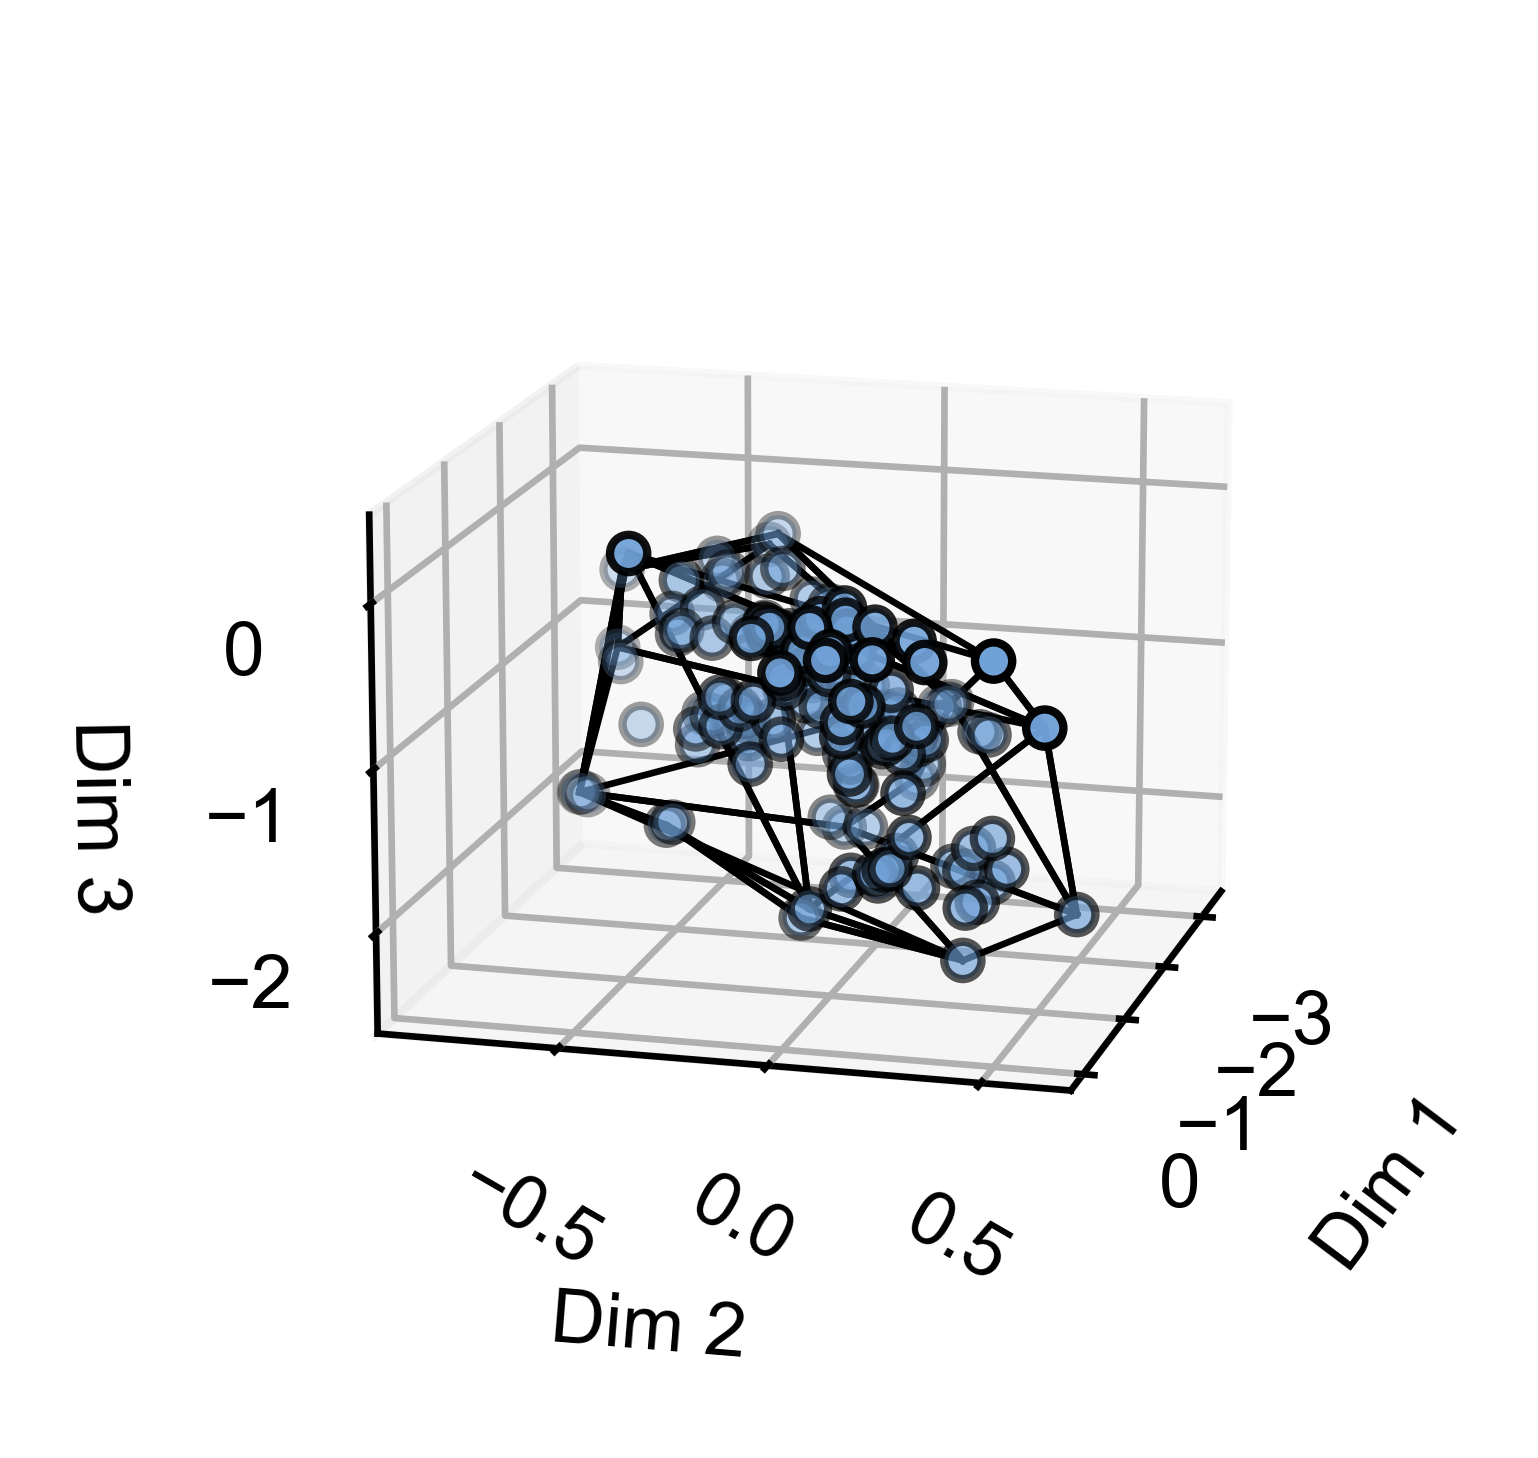

In [115]:

for fig_idx, rot_val in zip([0], [15]):
    
    
    fig = plt.figure(figsize = (2.5,2.5),dpi = 600)

    ax = plt.axes(projection="3d")
    ax.view_init(15, rot_val)
    
    
    p = ax.scatter(bzz1_z[:,0], bzz1_z[:,1], bzz1_z[:,2], c = '#70a1d7', edgecolor = 'k', s = 20)
    
    # convex hull rvs167: 
    for simplex in bzz1_hull.simplices:
        ax.plot(bzz1_z[simplex, 0], bzz1_z[simplex, 1],  bzz1_z[simplex, 2], 'k-', c = 'k',  lw=.8)
    

    ax.set_xlabel('Dim 1', labelpad=9)
    ax.set_ylabel('Dim 2', labelpad=9)
    ax.set_zlabel('Dim 3')
    ax.dist = 12.4
                  
    plt.yticks(rotation=-30)
    
    
    plt.tight_layout()